In [1]:
from datascience import *
import numpy as np

import matplotlib.pyplot as plt
plt.style.use("ggplot")
%matplotlib inline

# Notebook 6 - Group, Pivot, and Functions

## Data 6, Summer 2024

**TODO:** write introduction for notebook here. the purpose of this notebook is to provide students with practice examples for more complex table functions like group, pivot (maybe join and apply), as well as defining functions and maybe some additional row method questions as well. the starting file for this notebook simply contains Part 3 from Lab 4 / Notebook 5, or the notebook that works with UC Riverside data. Part 3 of that notebook features some uses of pivot and group. They're currently written as "just run this cell" examples for the students, but they should be restructured to be actual questions for the students to answer on their own

<div class="alert alert-warning">
The data that we'll be using in this lab contains data on <a href=https://ir.ucr.edu/stats/admission/undergraduate>University of California, Riverside's undergraduate admissions.</a> We'll be looking at this data today as we are interested in exploring the context and ethics behind education-related data (UC Riverside specifically was chosen as it was the UC that provided the most publicly accessible method of downloading the data). In this case, we are looking at the demographics of undergraduate students. This leads us to many important questions to consider: why does UC Riverside make this data publicly available? Why does it choose this format and these categories to represent students? Who or what is affected by the conclusions we make from analyzing this data? Think about these questions as you work through the lab.
</div>

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Part 3: Data Context Exploration

<div class="alert alert-warning">
As we saw at the end of Part 2, when working with data, it is always important to consider not only the impacts that the representation of the data can have in the real world</strong>, but also <strong>the effects that the conclusions from your data analysis and visualizations can have!</strong> While we were able to observe some interesting trends in Part 2, it is important to consider what types of conclusions we're making with our analysis and how applicable they are. In this part, we'll delve further into representations of data, while also utilizing additional data from UC Riverside broken down by college to try to analyze more interesting trends with student demographics.
</div>

### A Further Look Into the `Gender` Column

Let's continue with a bit more analysis on the `"Gender"` column. As stated above, the [source of the original data](https://ir.ucr.edu/stats/enrollment/demographic) from UC Riverside also included a second dataset that displays the same admissions data, broken down by college. An interesting question you may want to consider is why UC Riverside would make this type of breakdown available alongside the original dataset of the whole university. 

Let's load the dataset into a Table object below called `ucr_college`.

In [2]:
ucr_college = Table.read_table("data/riverside_by_college.csv")
ucr_college.show(5)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,10
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Two or More Races,7


As we can see from the `"Year"` column, this dataset also contains slightly more updated information, including data from 2023. Let's take a look at the way the data is represented in the `"Gender"` column for this dataset:

In [41]:
np.unique(ucr_college.column("Gender"))

array(['Female', 'Male', 'Nonbinary', 'Unknown'],
      dtype='<U9')

### Question 3.1 (Discussion)
It looks like this dataset contains the additional values of `"Nonbinary"` and `"Unknown"` for `"Gender"`. Take a look at the "Details about the data" section [at the bottom of the website.](https://ir.ucr.edu/stats/enrollment/demographic) How was this particular variable measured? How might this impact our comparison between the conclusions we come to with this data vs. the data we previously worked with?

*Hint:* Think about what reducing the number of categories would mean.

**SOLUTION:** The website states: "Gender identity has been collected on the UC admission application only since 2016. Therefore, there is no earlier data available in the nonbinary category." Something to note is that these datasets are supposed to represent the same information. However, because UCR utilized two methods of representing the `"Gender"` column, it may not be completely appropriate to compare the raw numbers of the values alone -- some of the individuals who are in the `"Nonbinary"` or `"Unknown"` category in this dataset were likely placed into the `"Female"` or `"Male"` categories in the other dataset. Therefore, the numbers could be a bit skewed, and it may be beneficial to compare by proportions as an additional step.

Doing this type of extra basic background research on the source of our data can be incredibly helpful in our understanding of our data!

---
### Exploration of Aggregation by College

#### Comparing STEM vs. Non-STEM majors by Gender: Filtering, Grouping, Joining

We can also use the information at the bottom of the page of the data source to find some information about how STEM majors are classified:

> "STEM Majors include those in the Bourns College of Engineering (BCOE) and the College of Natural and Agricultural Sciences (CNAS)."

Using this information, we can use the `where` method to create two different tables: one for STEM majors, and one for non-STEM majors. In the cell below, we generate the list of distinct college names at UC Riverside. As we see in the statement above, we can classify all non-STEM colleges as those in the list below, aside from the College of Engineering and the College of Natural and Agricultural Sciences.

In [42]:
np.unique(ucr_college.column("College"))

array(['Bourns College of Engineering',
       'College of Humanities, Arts, and Social Sciences',
       'College of Natural and Agricultural Sciences',
       'Graduate School of Education', 'School of Business',
       'School of Medicine', 'School of Public Policy'],
      dtype='<U48')

### Question 3.2
In the two cells below, use the `where` method to create two different tables: one for STEM majors (`ucr_stem`), and one for non-STEM majors (`ucr_nonstem`), based on which college they belong to.

In [13]:
ucr_stem = ucr_college.where("College", are.contained_in(["Bourns College of Engineering", "College of Natural and Agricultural Sciences"])) # SOLUTION
ucr_stem.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78


In [14]:
ucr_nonstem = ucr_college.where("College", are.contained_in(["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"])) # SOLUTION
ucr_nonstem.show(3)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,486
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,72
2023,"College of Humanities, Arts, and Social Sciences",Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,867


In [45]:
assert isinstance(ucr_stem, Table)

In [46]:
assert isinstance(ucr_nonstem, Table)

In [47]:
assert all(x in ["Bourns College of Engineering", "College of Natural and Agricultural Sciences"] for x in ucr_stem.column('College'))

In [48]:
assert all(x in ["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"] for x in ucr_nonstem.column('College'))

In [49]:
assert ucr_stem.num_rows == 7419

In [50]:
assert ucr_nonstem.num_rows == 9451

Now, if we wanted to do a rough tabular comparison of the STEM vs. non-STEM majors, we can group by `"Gender"` and compare the numbers.

For now, don't worry too much about understanding the syntax for the group method: we'll cover it in the next lab! The code in the two cells below simply aggregates the data by calculating the sums of the `"Fall Headcount"` column for each gender category.

In [15]:
ucr_stem_grouped = ucr_stem.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_stem_grouped 

Gender,Fall Headcount sum
Male,132516
Female,96494
Unknown,1063
Nonbinary,428


In [16]:
ucr_nonstem_grouped = ucr_nonstem.group("Gender", np.sum).select(["Gender", "Fall Headcount sum"]).sort("Fall Headcount sum", descending=True)
ucr_nonstem_grouped 

Gender,Fall Headcount sum
Female,195432
Male,136041
Unknown,1499
Nonbinary,1166


<div class="alert alert-warning">
From the above two tables, we see an interesting discrepancy that we see quite often with this type of education-relatd data. There are more male-identifying individuals represented by the STEM majors, and more female-identifying individuals repesented by the non-STEM majors. Thanks to the other two representations of <code>"Unknown"</code> and <code>"Nonbinary"</code> though, we can also see that there are more of these individuals in the non-STEM majors table as well.
</div>

Using what we learned in Lab 3, we can also visualize the data to be able to see the trends and proportions of the data more clearly. Below, let's create a joined version of the headcounts split by gender for with one column containing the fall headcounts for STEM colleges, and another containing the headcounts for non-STEM colleges, in order to create an overlaid bar chart.

### Question 3.3
Performing join on `"Gender"` column between `uc_stem_grouped` and `uc_nonstem_grouped`

In [18]:
ucr_joined_gender = ucr_stem_grouped.join('Gender', ucr_nonstem_grouped) # SOLUTION
ucr_joined_gender = ucr_joined_gender.relabeled(['Fall Headcount sum', 'Fall Headcount sum_2'], ['STEM Fall Headcount', 'Non-STEM Fall Headcount'])
ucr_joined_gender

Gender,STEM Fall Headcount,Non-STEM Fall Headcount
Female,96494,195432
Male,132516,136041
Nonbinary,428,1166
Unknown,1063,1499


<div class="alert alert-warning">
Something to note from the table we created above is that is essentially a pivot table of our original table -- we see <code>"Gender"</code> as our rows, STEM vs. non-STEM status as our columns, and the <code>"Fall Headcount"</code> as our values.
</div>

### Question 3.4
Using the `ucr_joined_gender` table, create an overlaid bar chart plotting the breakdown of the `Gender` category between the two college types. 

*Hint:* Look back to how we created overlaid bar charts in Lab 3 if you're stuck!

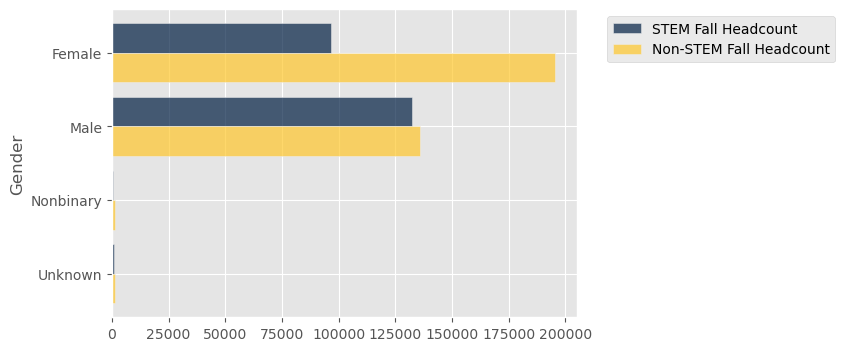

In [54]:
ucr_joined_gender.barh('Gender', overlay = True) # SOLUTION

#### Comparing STEM vs. Non-STEM majors by Race/Ethnicity: Defining a Function, Applying, Pivoting

<div class="alert alert-warning">We looked into some aspects of the students' race/ethnicities in Part 2, but now we can dig a little deeper by performing the same process of grouping our data and visualizing the distribution between the STEM and non-STEM colleges. However, as we were exploring the colleges by <code>"Gender"</code>, it required quite a lot of work with respect to filtering and joining the tables in order to get the complete aggregated table that we needed for our visualization. In this section, we'll look at a different approach that utilizes custom functions and more complex table methods to achieve the same result more stylistically. </div>

<div class="alert alert-warning">Below, we'll create lists of the colleges divided by STEM and non-STEM majors. We'll be able to utilize these lists in the following question, where we define a function to add a column to our table.</div>

In [7]:
stem_colleges = ["Bourns College of Engineering", "College of Natural and Agricultural Sciences"]
nonstem_colleges = ["College of Humanities, Arts, and Social Sciences", "Graduate School of Education", "School of Business", "School of Medicine", "School of Public Policy"]

### Question 3.5
Defining the function that creates the intermediate Boolean column, specifying whether the College input is STEM or non-STEM

In [8]:
def is_stem(college):
    return college in stem_colleges # SOLUTION

<div class="alert alert-warning">We'll use the function we just created in the next exercise to add a new column to our table called <code>'Is STEM?'</code> that contains a True or False value for whether the college is STEM or non-STEM. In order to create this column, we'll use the <code>.apply</code> method.</div>

### Question 3.6
Using .apply with the is_stem function to create new column

In [9]:
ucr_apply_test = ucr_college.with_column('Is STEM?', ucr_college.apply(is_stem, 'College'))
ucr_apply_test.show(5)

Year,College,Level,Original Entry Type,New/Continuing Status,Full-Time Status,Gender,IPEDS Race/Ethnicity,Fall Headcount,Is STEM?
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Asian,81,True
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Black/African American,5,True
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Chicano/Latino,78,True
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,International,10,True
2023,Bourns College of Engineering,Undergraduate,Undergraduate Frosh,New,Full-Time,Female,Two or More Races,7,True


### Question 3.7
Using pivot with the Is Stem? column and Race/Ethnicity column to create table ready for overlaid visualization

In [10]:
ucr_pivot_test = ucr_apply_test.pivot('Is STEM?', 'IPEDS Race/Ethnicity', collect = np.sum, values = 'Fall Headcount').relabeled(['False', 'True'], ['Non-STEM Fall Headcount', 'STEM Fall Headcount'])
ucr_pivot_test

IPEDS Race/Ethnicity,Non-STEM Fall Headcount,STEM Fall Headcount
American Indian/Alaskan Native,1082,440
Asian,101707,89621
Black/African American,18210,7889
Chicano/Latino,112421,54809
Domestic Unknown,13140,8060
International,14528,18424
Native Hawaiian/Pacific Islander,362,137
Two or More Races,8466,7356
White,64222,43765


<div class="alert alert-warning">
Below, we create an overlaid bar chart for Race/Ethnicity as we did with Gender earlier.
</div>

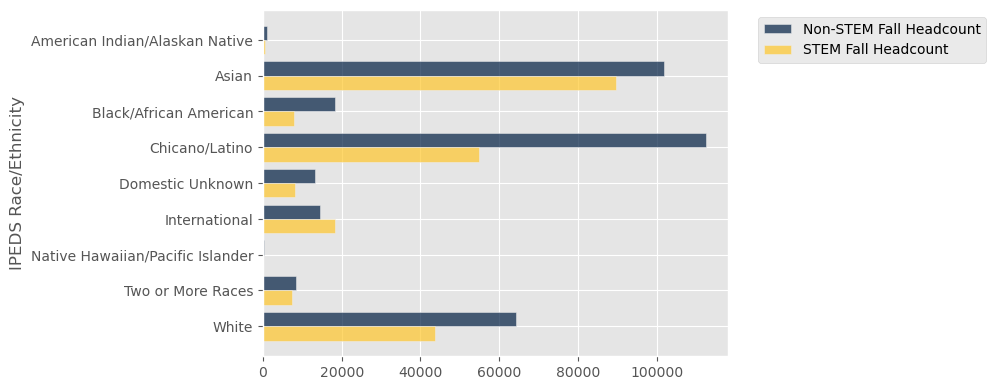

In [11]:
ucr_pivot_test.barh('IPEDS Race/Ethnicity', overlay = True)

<div class="alert alert-warning">
Here, we see that for non-STEM colleges, we witness a handful of the trends that we saw in Part 2, with Chicanx/Latinx and Asian students making up a large proportion, while Native Hawaiian/Pacific Islander students making up the smallest. However, again, we see a shift for the STEM colleges, where Asian students seem to make up a large majority of the students.
</div>

<div class="alert alert-warning">
<strong>TODO:</strong> Sentence here about ease of this example as compared to what we had to do for Gender column
</div>

### Bonus Question (Not Graded)
Above, we explored two different methods when looking at `"Gender"` and `"Race/Ethnicity"`. For extra practice, consider trying out the alternative methods of creating the pivot tables on the opposite category.

<div class="alert alert-warning">
As we come to an end of our exploration of student demographics from UC Riverside, consider what we've learned about the different representations of categories, as well as what sorts of conclusions we were able to effectively draw from tabular vs. visualization methods. What more could we still do in order to more concretely explore student demographics? What type of information do you think is missing that could be useful? How might you change the way that some of these demographics are represented, if data collection could be more flexible and supportive of values that lie on a continuum or are subject to changes?
</div>

Going back to an idea we posed when starting to look into the `"Gender"` column: while this type of exploration is very important and can also be informative, it is also important to remember that it is not always enough to simply look at a trend like this and state it. Ultimately, it is typically very hard to encode data about humans into numbers and categories, **because in doing so, we lose information and context about the individual we are looking at.** In your analysis in the future, try to strike a balance of looking at interesting trends in the data and considering the original context of the data you're working with.

**Finally, for reference, here is the link to the Data 6 Python Reference (our Python cheat-sheet) so you can review some of the methods we've used for tables in this lab!**

[Python Reference](http://data6.org/su23/reference)

---
## Done! 😇

That's it! There's nowhere for you to submit this, as labs are not assignments. However, please ask any questions you have with this notebook in lab or on Ed.

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()